In [1]:
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [2]:
runs_root = Path('../quickruns')
for c in runs_root.iterdir():
    print(c.name)

a2c
dqn_base
dqn_histogram
dqn_norms
eps0
onestep
pairlink
reinforce
tai35
tai35mse


In [8]:
experiment_name = "pairlink"
paths = list(sorted((runs_root / experiment_name).iterdir()))

In [9]:
import drlqap.experiment as exp

In [10]:
metadatas = [exp.load_metadata(path) for path in paths]

In [11]:
from drlqap.evaltools import load_float_txt
values = [load_float_txt(path / "value.txt") for path in paths]

In [12]:
metadata = [
    {
        'path': path,
        'seed': meta['seed'],
        **meta['agent_arguments'],
    }
    for path, meta in zip(paths, metadatas)
]
meta_df = pd.DataFrame(metadata)

In [13]:
meta_index = pd.MultiIndex.from_frame(meta_df)

In [14]:
df = pd.DataFrame(values, index = meta_index)

In [15]:
# Filter data manually here
#df = df.query('seed < 3 and learning_rate > 1e-5')

In [16]:
df.head()

,,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
path,seed,,,,,,,,,,,,,,,,,,,,,
../quickruns/pairlink/dqn_linkedqap,0,16.305267,15.823707,10.316822,14.572405,11.92717,17.730357,16.976777,10.414158,11.491565,9.78939,...,16.790195,17.064218,13.625865,12.333511,14.559984,17.746682,18.217424,17.225036,20.179954,13.581274


In [17]:
def aggregate(df, key, window, agg):
        return df.groupby(key).aggregate(agg).transpose().rolling(window).mean()

def generate_variation_plot(df, key, window):
    mean = aggregate(df, key, window, 'mean')
    upper = aggregate(df, key, window, 'max')
    lower = aggregate(df, key, window, 'min')
    cmap = matplotlib.cm.get_cmap('tab10')
    count = len(mean.columns)
    for i, col in enumerate(mean.columns):
        color = cmap(i)
        plt.fill_between(mean[col].index, lower[col], upper[col], alpha=0.1, color=color)
        individuals = df[df.index.get_level_values(key) == col].transpose().rolling(window).mean()
        for i in individuals:
            plt.plot(individuals[i], alpha=0.15, linewidth=5, color=color)
        plt.plot(mean[col], label=col, color=color, linewidth=2)
    plt.legend()

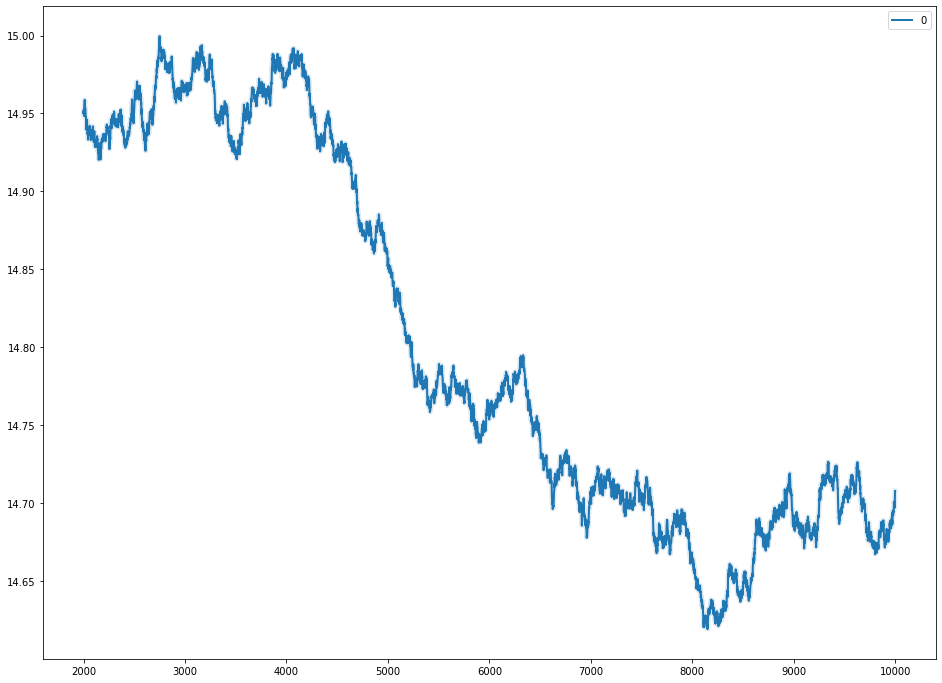

In [21]:
plt.figure(figsize=(16, 12))
generate_variation_plot(df, 'seed', 2000)